# Exploring the video game sales data and performing some basic analysis

## Importing the necessary libraries

In [1]:
#Importing libraries and Reading the file 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../input/videogamesales/vgsales.csv")
print('Ready!')

Ready!


In [2]:
df.columns=["rank","name","platform","year","genre","publisher","na","eu","jp","rest","gb"]

In [3]:
df.head()

,rank,name,platform,year,genre,publisher,na,eu,jp,rest,gb
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## **Data Cleaning**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       16598 non-null  int64  
 1   name       16598 non-null  object 
 2   platform   16598 non-null  object 
 3   year       16327 non-null  float64
 4   genre      16598 non-null  object 
 5   publisher  16540 non-null  object 
 6   na         16598 non-null  float64
 7   eu         16598 non-null  float64
 8   jp         16598 non-null  float64
 9   rest       16598 non-null  float64
 10  gb         16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# A game named 'Imagine: Makeup Artist' had an incorrect year value. Changed it to 2009.
df.year = df.year.replace(2020.0, 2009.0)
df.year.max()

2017.0

In [6]:
df['year'] = df['year'].fillna(2009.0)
df['year'].isna().sum()

0

In [7]:
#convert type of column to int
df['year'] = df['year'].astype('int')

In [8]:
#drop 2017 rows as they are just a total of 3 entries. 
df.drop(df[df['year']==2017.0].index, axis=0, inplace=True)

In [9]:
df['publisher'] = df['publisher'].fillna('Unknown Publisher')
df['publisher'].isna().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16595 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       16595 non-null  int64  
 1   name       16595 non-null  object 
 2   platform   16595 non-null  object 
 3   year       16595 non-null  int64  
 4   genre      16595 non-null  object 
 5   publisher  16595 non-null  object 
 6   na         16595 non-null  float64
 7   eu         16595 non-null  float64
 8   jp         16595 non-null  float64
 9   rest       16595 non-null  float64
 10  gb         16595 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


## Q1. Top 10 selling games of all time (Global and region-wise).

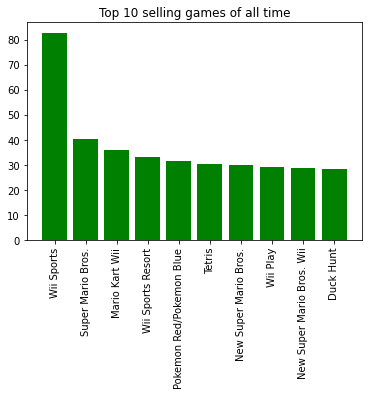

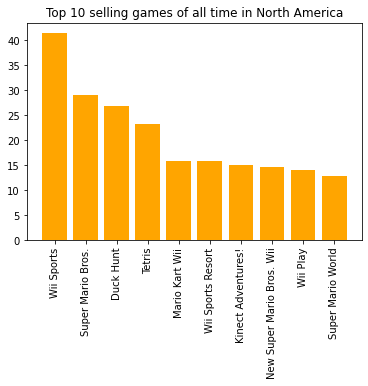

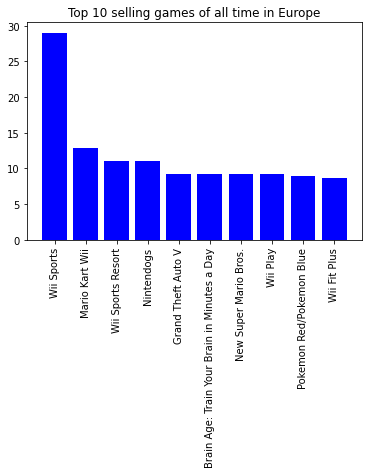

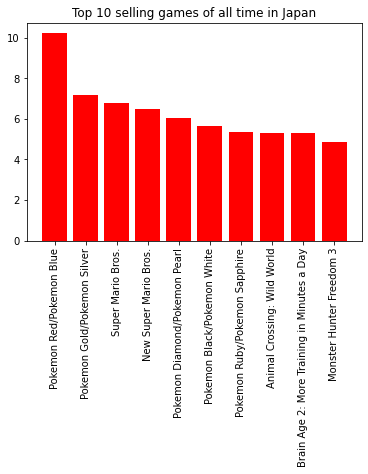

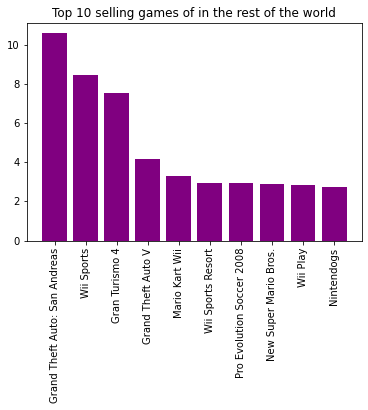

In [11]:
plt.bar(data=df.head(10), x='name', height='gb', color = 'green')
plt.xticks(rotation=90)
plt.title('Top 10 selling games of all time')
plt.show()

top_10_na=df.sort_values('na', ascending=0).head(10)
plt.bar(data=top_10_na, x='name', height='na', color='orange')
plt.xticks(rotation=90)
plt.title('Top 10 selling games of all time in North America')
plt.show()

top_10_eu=df.sort_values('eu', ascending=0).head(10)
plt.bar(data=top_10_eu, x='name', height='eu', color='blue')
plt.xticks(rotation=90)
plt.title('Top 10 selling games of all time in Europe')
plt.show()

top_10_jp=df.sort_values('jp', ascending=0).head(10)
plt.bar(data=top_10_jp, x='name', height='jp', color='red')
plt.xticks(rotation=90)
plt.title('Top 10 selling games of all time in Japan')
plt.show()

top_10_rest=df.sort_values('rest', ascending=0).head(10)
plt.bar(data=top_10_rest, x='name', height='rest', color='purple')
plt.xticks(rotation=90)
plt.title('Top 10 selling games of in the rest of the world')
plt.show()

## 2. Top selling platform of all time and region-wise.

In [12]:
df.groupby('platform').agg({'gb': sum}).head(10).sort_values(by='gb', ascending=False)

,gb
platform,
DS,822.49
GBA,318.50
GB,255.45
3DS,247.46
GC,199.36
2600,97.08
GEN,28.36
DC,15.97
3DO,0.10


In [13]:
df.groupby('platform').agg({'na': sum}).head(5).sort_values(by='na', ascending=False)

,na
platform,
DS,390.71
2600,90.60
3DS,78.87
DC,5.43
3DO,0.00


In [14]:
df.groupby('platform').agg({'eu': sum}).head(5).sort_values(by='eu', ascending=False)

,eu
platform,
DS,194.65
3DS,58.52
2600,5.47
DC,1.69
3DO,0.00


In [15]:
df.groupby('platform').agg({'jp': sum}).head(5).sort_values(by='jp', ascending=False)

,jp
platform,
DS,175.57
3DS,97.35
DC,8.56
3DO,0.10
2600,0.00


In [16]:
df.groupby('platform').agg({'rest': sum}).head(5).sort_values(by='rest', ascending=False)

,rest
platform,
DS,60.53
3DS,12.63
2600,0.91
DC,0.27
3DO,0.00


### 3. What are the top selling genres of all time? Region-wise?

In [17]:
df.groupby('genre').agg({'gb': sum}).head(5).sort_values(by='gb', ascending=False)

,gb
genre,
Action,1751.17
Platform,831.37
Misc,809.96
Fighting,448.91
Adventure,239.04


In [18]:
df.groupby('genre').agg({'na': sum}).head(5).sort_values(by='na', ascending=False)

,na
genre,
Action,877.83
Platform,447.05
Misc,410.24
Fighting,223.59
Adventure,105.80


In [19]:
df.groupby('genre').agg({'eu': sum}).head(5).sort_values(by='eu', ascending=False)

,eu
genre,
Action,525.00
Misc,215.98
Platform,201.63
Fighting,101.32
Adventure,64.13


In [20]:
df.groupby('genre').agg({'jp': sum}).head(5).sort_values(by='jp', ascending=False)

,jp
genre,
Action,159.94
Platform,130.77
Misc,107.76
Fighting,87.35
Adventure,52.07


In [21]:
df.groupby('genre').agg({'rest': sum}).head(5).sort_values(by='rest', ascending=False)

,rest
genre,
Action,187.38
Misc,75.32
Platform,51.59
Fighting,36.68
Adventure,16.81


## 4. What is the top selling game each year?

In [22]:
yearlytop_sort = df[['year', 'name', 'platform','gb']].sort_values(by=['year', 'gb'], ascending=[True, False])
yearlytop = yearlytop_sort.groupby('year')
yearlytop = yearlytop.head(1).reset_index(drop=1)
yearlytop

#How do I remove the index ranks? Anyone?

,year,name,platform,gb
0,1980,Asteroids,2600,4.31
1,1981,Pitfall!,2600,4.50
2,1982,Pac-Man,2600,7.81
3,1983,Baseball,NES,3.20
4,1984,Duck Hunt,NES,28.31
5,1985,Super Mario Bros.,NES,40.24
6,1986,The Legend of Zelda,NES,6.51
7,1987,Zelda II: The Adventure of Link,NES,4.38
8,1988,Super Mario Bros. 3,NES,17.28
9,1989,Tetris,GB,30.26


## 5. What is the top selling platform each year?

In [23]:
platform_agg = df.groupby(['year', 'platform']).agg({'gb' : sum})
top_platform = platform_agg['gb'].groupby(level=0, group_keys=False)
top_platform_final = top_platform.apply(lambda x: x.sort_values(ascending=False).head(1))
# top_platform_final
top_platform.nlargest(1)

year  platform
1980  2600         11.38
1981  2600         35.77
1982  2600         28.86
1983  NES          10.96
1984  NES          50.09
1985  NES          53.44
1986  NES          36.41
1987  NES          19.76
1988  NES          45.01
1989  GB           64.98
1990  SNES         26.16
1991  SNES         16.21
1992  SNES         32.98
1993  SNES         40.01
1994  SNES         35.08
1995  PS           35.92
1996  PS           94.68
1997  PS          136.08
1998  PS          169.58
1999  PS          144.57
2000  PS           96.28
2001  PS2         166.43
2002  PS2         205.40
2003  PS2         184.29
2004  PS2         211.78
2005  PS2         160.65
2006  Wii         137.91
2007  Wii         154.97
2008  Wii         174.16
2009  Wii         227.34
2010  X360        171.05
2011  PS3         159.37
2012  PS3         109.49
2013  PS3         117.39
2014  PS4          98.76
2015  PS4         115.30
2016  PS4          39.25
Name: gb, dtype: float64

## 6. What is the top selling genre each year?

In [24]:
genre_agg = df.groupby(['year', 'genre']).agg({'gb' : sum})
top_genre = genre_agg['gb'].groupby(level=0, group_keys=False)
# top_genre_final = top_genre.apply(lambda x: x.sort_values(ascending=False).head(1))
top_genre.nlargest(1)

year  genre       
1980  Shooter           7.07
1981  Action           14.84
1982  Puzzle           10.03
1983  Platform          6.93
1984  Shooter          31.10
1985  Platform         43.17
1986  Action           13.74
1987  Fighting          5.42
1988  Platform         27.73
1989  Puzzle           37.75
1990  Platform         22.97
1991  Platform          7.64
1992  Fighting         15.25
1993  Platform         18.67
1994  Platform         28.74
1995  Platform         16.69
1996  Role-Playing     43.96
1997  Racing           31.91
1998  Sports           41.79
1999  Role-Playing     49.09
2000  Sports           41.19
2001  Action           59.39
2002  Action           86.77
2003  Action           67.93
2004  Action           76.26
2005  Action           85.69
2006  Sports          136.16
2007  Action          106.50
2008  Action          136.39
2009  Action          167.66
2010  Action          117.64
2011  Action          118.96
2012  Action          122.04
2013  Action          12

## 7. Sales of all genres till date.


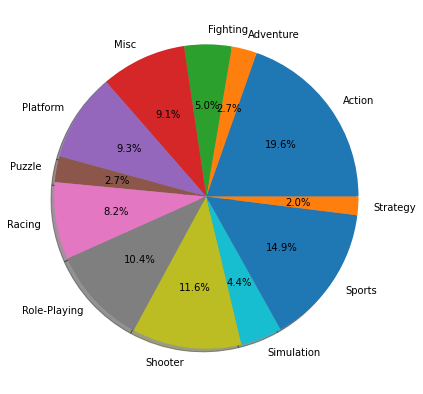

In [25]:
total_genre_sales = df.groupby('genre')['gb'].sum()
genre_labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
fig = plt.figure(figsize =(10, 7)) 
plt.pie(total_genre_sales, labels=genre_labels, shadow=True, autopct='%1.1f%%')
plt.show()

##### Action and Sports genre leading the sales.

In [26]:
total_genre_sales
#Tabular repreentation of the output

genre
Action          1751.17
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.33
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: gb, dtype: float64

## 8. Yearly total sales.

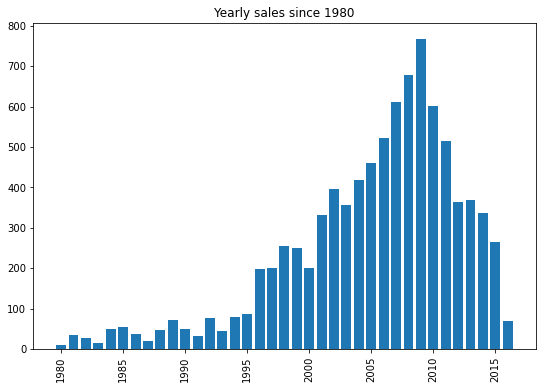

In [27]:
yearly_sales = df.groupby('year').agg({'gb':sum})
yearly_sales = yearly_sales.sort_values(by='year', ascending=1).reset_index()

fig = plt.figure(figsize =(9, 6)) 
plt.bar(data=yearly_sales, x='year', height='gb')
plt.xticks(rotation=90)
plt.title('Yearly sales since 1980')
plt.show()

##### 2008 and 2009 witnessed the highest game sales.


## 9. Highest selling publisher of all time

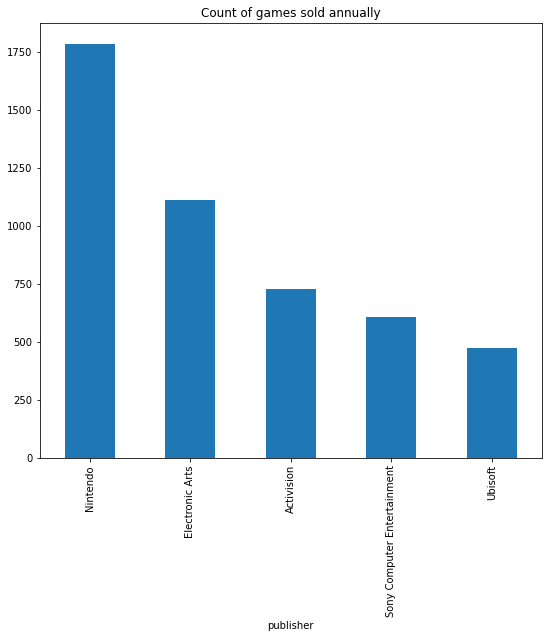

In [28]:
top_publisher = df[['publisher', 'gb']]
top_publisher = top_publisher.groupby('publisher')['gb'].sum()
fig = plt.figure(figsize =(9, 8)) 
top_publisher.nlargest(5).plot.bar(x='publisher', y='gb')
plt.title('Count of games sold annually')
plt.show()

##### Nintendo leading the all time sales followed by EA and Activition.

## 10. Number of games released.

In [29]:
yearly_game = df.groupby('year')['name'].count().reset_index()

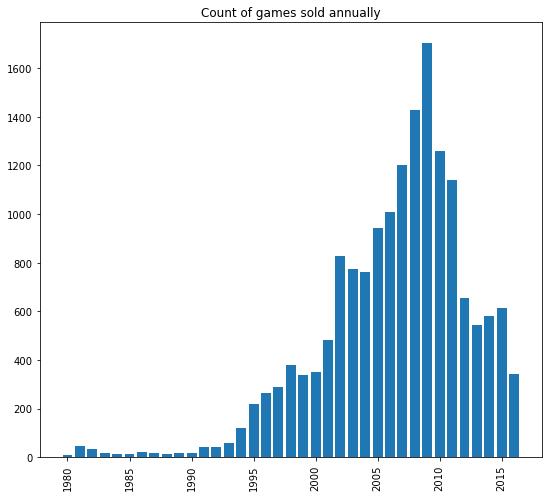

In [30]:
fig = plt.figure(figsize =(9, 8)) 
plt.bar(yearly_game['year'], yearly_game['name'])
plt.xticks(rotation=90)
plt.title('Count of games sold annually')
plt.show()

##### Highest number of games were released in 2007 and 2008 with over 1400+ games released in each of them.